# UUID retrieval

## Create search query and retrieve corresponding document UUIDs

For effective document UUID retrieval we need Solr search query, the query can be generated using provided `QueryFactory` or its implementation inside `MZKScraper`. `QueryFactory` is just a reverse-engineered script that runs on MZK's website to convert human-readable queries into Solr queries for direct access through API, and it is not perfect.

In case of text-based search or more complicated conditions, `MZKScraper`'s `retrieve_query_directly_from_mzk` method has to be used. This method uses `seleniumwire` to dynamically load the page and catches the XHR call that contains the wanted Solr query.

> Note: Easiest way to obtain parameters is to open MZK website and search for desired documents, the query is a part of pages url.

### Resources

- [JavaScript implementation of human-readable to Solr method](https://github.com/ceskaexpedice/kramerius-web-client/blob/master/src/app/services/solr.service.ts)
- [supported languages](docs/languages.json)
- [supported "physical locations"](docs/physical_locations.json)

### Limitations

Currently, `convolute` and `soundrecording` are supported as `doctypes`, but content UUIDs are not retrievable with the current implementation.

In [35]:
from mzkscraper.Scraper import MZKScraper

scraper = MZKScraper()

# create Solr query
solr_query = scraper.construct_solr_query_with_qf(licences="public", doctypes="sheetmusic")
print(solr_query)

# retrieve first 10 documents by query
retrieved_documents = scraper.retrieve_document_ids_by_solr_query(solr_query, requested_document_count=10)

# print results
print(f"Number of retrieved documents: {len(retrieved_documents)}")
for i, result in enumerate(retrieved_documents):
    print(f"{i}: {result}")

((model:monograph+OR+model:periodical+OR+(model:collection+AND+collection.is_standalone:true)+OR+model:graphic+OR+model:map+OR+model:sheetmusic+OR+model:soundrecording+OR+model:archive+OR+model:manuscript+OR+model:convolute+OR+model:monographunit)+AND+((licenses:public+OR+contains_licenses:public+OR+licenses_of_ancestors:public))+AND+(model:sheetmusic))


100%|██████████| 1/1 [00:00<00:00, 13.68it/s]

Number of retrieved documents: 10
0: 0a0b8917-5fab-11e1-ae74-0050569d679d
1: 127063e1-e250-4505-9833-42900d275b5e
2: 3feeea0c-aa9c-45f5-982a-9c1937d123d2
3: c7cf21d0-685c-11e7-b92d-005056827e51
4: b7385da0-4d91-11e6-a5c5-005056827e51
5: 8002d085-4068-11e1-ac09-0050569d679d
6: 50be2cd0-685c-11e7-b92d-005056827e51
7: d3c3f84a-5faa-11e1-ae74-0050569d679d
8: 3d342f60-4d88-11e6-ab2f-005056827e52
9: ec322820-ded1-11e6-8a71-005056827e52


In [36]:
# create human-readable query
hm_query = scraper.construct_hm_query(text_query="Komenský")
print(hm_query)

# load MZK with seleniumwire and catch XHR
solr_query = scraper.transform_query_from_hm_to_solr_using_mzk(hm_query)
print(solr_query)

# retrieve first 10 documents by query
retrieved_documents2 = scraper.retrieve_document_ids_by_solr_query(solr_query, requested_document_count=10)

# print results
print(f"Number of retrieved documents: {len(retrieved_documents2)}")
for i, result in enumerate(retrieved_documents2):
    print(f"{i}: {result}")

https://www.digitalniknihovna.cz/mzk/search?text_query=Komensk%C3%BD&access=&keywords=&authors=&languages=&licences=&locations=&publishers=&places=&genres=&doctypes=&published_from=&published_to=
(model:monograph%20OR%20model:periodical%20OR%20(model:collection%20AND%20collection.is_standalone:true)%20OR%20model:graphic%20OR%20model:map%20OR%20model:sheetmusic%20OR%20model:soundrecording%20OR%20model:archive%20OR%20model:manuscript%20OR%20model:convolute%20OR%20model:monographunit)


100%|██████████| 1/1 [00:00<00:00, 19.93it/s]

Number of retrieved documents: 10
0: 64ba013e-8404-4193-b271-01475e734494
1: 64c1235d-4ef3-40ad-9e34-cf1f0c7e9c7e
2: 639726c0-22b6-11e4-8413-5ef3fc9ae867
3: 64c860c3-3cab-4085-b8f0-c5f70b3fe3ff
4: 63854450-5a4a-11eb-b4d1-005056827e51
5: 646ad030-1bc0-11e4-8f64-005056827e52
6: 637f2c7e-0eba-4669-b49c-4492f6701f16
7: 63843197-52b6-4134-9bf5-cf3085f056f9
8: 6373993b-be5e-4f2b-bb04-d29faece2602
9: 637a928a-fe06-45db-a224-563bd6fff2f5


## Retrieve page UUIDs from a document UUID

MZK provides labels for each page (roughly) in this format:

- `["number""letter"] ("type")`
- `["number"] ("type")`
- `"number" ("type")`
- `"number" "type"`

and possibly any other combination of these.

When processing the page, the label gets stripped only to `"type"`. MZK labels are in camel case, by default we output in snake case. If labels are to be filtered inside the method, the `valid_labels` should be a list of labels in snake case.

In [37]:
# retrieve page uuids using document uuid
retrieved_pages = scraper.get_pages_in_document(retrieved_documents[0])
for i, page in enumerate(retrieved_pages):
    print(f"{i + 1}: {page.page_id} label: {page.label}")

1: 0a11caa8-5fab-11e1-ae74-0050569d679d label: front_cover
2: 0a9a3489-5fab-11e1-ae74-0050569d679d label: front_end_sheet
3: 0b37d41a-5fab-11e1-ae74-0050569d679d label: title_page
4: 0bbdf40b-5fab-11e1-ae74-0050569d679d label: normal_page
5: 0c4acabc-5fab-11e1-ae74-0050569d679d label: normal_page
6: 0cc8fb6d-5fab-11e1-ae74-0050569d679d label: normal_page
7: 0d4927ee-5fab-11e1-ae74-0050569d679d label: normal_page
8: 0dc7318f-5fab-11e1-ae74-0050569d679d label: normal_page
9: 0e4a1d30-5fab-11e1-ae74-0050569d679d label: normal_page
10: 0ec7d8b1-5fab-11e1-ae74-0050569d679d label: normal_page
11: 0f46f3c2-5fab-11e1-ae74-0050569d679d label: normal_page
12: 0fc3c4e3-5fab-11e1-ae74-0050569d679d label: normal_page
13: 104c55d4-5fab-11e1-ae74-0050569d679d label: normal_page
14: 10d55bf5-5fab-11e1-ae74-0050569d679d label: normal_page
15: 11570f16-5fab-11e1-ae74-0050569d679d label: normal_page
16: 11deb5a7-5fab-11e1-ae74-0050569d679d label: normal_page
17: 1268a628-5fab-11e1-ae74-0050569d679d label

In [38]:
# retrieve only title pages (collecting all page uuids and filtering them afterwards is also an option)
document_title_pages = scraper.get_pages_in_document(retrieved_documents[0], valid_labels=["TitlePage"])
for i, page in enumerate(document_title_pages):
    print(f"{i + 1}: {page.page_id} label: {page.label}")

1: 0b37d41a-5fab-11e1-ae74-0050569d679d label: title_page


## Display/download image using its UUID

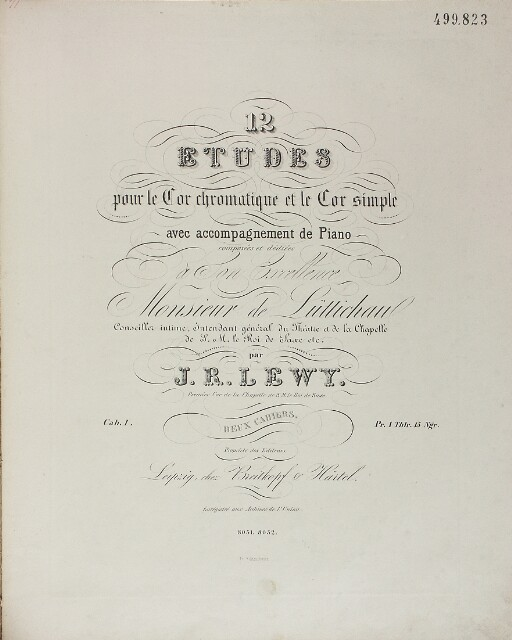

In [39]:
scraper.get_image(document_title_pages[0].page_id)

# download page
# scraper.download_image(
#     document_title_pages[0].page_id,
#     "document_title_page.jpg",
#     Path("path/to/the/your_dir"),
#     verbose=True
# )

# Citations

## Collect information about a document

Citations are generated using MZK's API and returned as a class `Citation`, that is easily extensible.

In [40]:
from mzkscraper.Citations.CitationGenerator import MZKCitationGenerator

citgen = MZKCitationGenerator()

# cite pages with indexes [2, 3, 6, 10]
cited_pages = [
    citgen.retrieve_citation_data_from_document_metadata(
        retrieved_documents[0], retrieved_pages[index].page_id) for index in [2, 3, 6, 10]
]

for cit in cited_pages:
    print(cit)
    print()

Citation(authors=[('Joseph Rudolf', 'Lewy')], title=12 Etudes, subtitle=pour le Cor chromatique et le Cor simple avec accompagnement de Piano : deux cahiers, publisher=Breitkopf et Härtel, date_issued=[1850?], place_issued=Leipzig, page_numbers=[2], identifiers={'uuid': 'uuid:0a0b8917-5fab-11e1-ae74-0050569d679d', 'sysno': 'MZK01-000771404', 'barCode': '2619217555'}, document_url=https://www.digitalniknihovna.cz/mzk/uuid/uuid:0a0b8917-5fab-11e1-ae74-0050569d679d)

Citation(authors=[('Joseph Rudolf', 'Lewy')], title=12 Etudes, subtitle=pour le Cor chromatique et le Cor simple avec accompagnement de Piano : deux cahiers, publisher=Breitkopf et Härtel, date_issued=[1850?], place_issued=Leipzig, page_numbers=[3], identifiers={'uuid': 'uuid:0a0b8917-5fab-11e1-ae74-0050569d679d', 'sysno': 'MZK01-000771404', 'barCode': '2619217555'}, document_url=https://www.digitalniknihovna.cz/mzk/uuid/uuid:0a0b8917-5fab-11e1-ae74-0050569d679d)

Citation(authors=[('Joseph Rudolf', 'Lewy')], title=12 Etudes,

## Merge citations

Sometimes we have multiple citations of one document the only difference being page numbers, we can merge those.

In [41]:
grouped_citations = citgen.group_page_citation_by_document_id(cited_pages)

for cit in grouped_citations:
    print(cit)
    print()

Citation(authors=[('Joseph Rudolf', 'Lewy')], title=12 Etudes, subtitle=pour le Cor chromatique et le Cor simple avec accompagnement de Piano : deux cahiers, publisher=None, date_issued=[1850?], place_issued=Leipzig, page_numbers=[2, 3, 6, 10], identifiers={'uuid': 'uuid:0a0b8917-5fab-11e1-ae74-0050569d679d', 'sysno': 'MZK01-000771404', 'barCode': '2619217555'}, document_url=https://www.digitalniknihovna.cz/mzk/uuid/uuid:0a0b8917-5fab-11e1-ae74-0050569d679d)



## Generate citations in ISO690 and BibTex format

In [42]:
print(grouped_citations[0].get_iso_690_citation())
print()
print(grouped_citations[0].get_bibtex_citation())

LEWY, Joseph Rudolf. 12 Etudes: pour le Cor chromatique et le Cor simple avec accompagnement de Piano : deux cahiers. [1850?], s. [2, 3, 6, 10]. Dostupné také z: https://www.digitalniknihovna.cz/mzk/uuid/uuid:0a0b8917-5fab-11e1-ae74-0050569d679d

@misc{Lewy1850,
    author = {Joseph Rudolf Lewy},
    title = {12 Etudes},
    subtitle = {pour le Cor chromatique et le Cor simple avec accompagnement de Piano : deux cahiers},
    publisher = {},
    year = {[1850?]},
    pages = {2, 3, 6, 10},
    isbn = {},
    url = {https://www.digitalniknihovna.cz/mzk/uuid/uuid:0a0b8917-5fab-11e1-ae74-0050569d679d}
}
